In [2]:
import pandas as pd
import json
from pandas import json_normalize

In [3]:
import requests
from io import StringIO
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"


# Baixar os dados
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

In [4]:
print(df.head())  # Mostra as primeiras 5 linhas
print(df.info())  # Mostra tipos de dados e se há valores nulos

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [5]:
# Normaliza cada coluna de dicionário
customer_data = json_normalize(df['customer'])
phone_data = json_normalize(df['phone'])
internet_data = json_normalize(df['internet'])
account_data = json_normalize(df['account'])

In [6]:
df_final = pd.concat([
    df[['customerID', 'Churn']],  # Mantém as colunas principais
    customer_data,
    phone_data,
    internet_data,
    account_data
], axis=1)  # axis=1 para unir por colunas
df_final.columns = df_final.columns.str.replace('.', '_')

In [7]:
print(df_final.head())  # Confira se os dados estão corretos
print(df_final.columns)  # Veja os nomes das colunas

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [8]:
# Contagem de Churn (clientes que cancelaram)
print(df_final['Churn'].value_counts())

# Estatísticas básicas
print(df_final.describe())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
       SeniorCitizen       tenure  Charges_Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000


In [9]:
# Verificar primeiras linhas
print(df.head())

# Verificar tipos de dados e valores nulos
print(df.info())

# Estatísticas descritivas (apenas colunas numéricas)
print(df.describe())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [10]:
# Normalizar colunas com dicionários
from pandas import json_normalize

# Juntar tudo em um novo DataFrame
df_clean = df_final.copy()

# Verificar nulos
print("Valores nulos por coluna:")
print(df_clean.isnull().sum())

# Tratar nulos
df_clean.fillna({
    'SeniorCitizen': 0,
    'Partner': 'Unknown',
    'Dependents': 'Unknown',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No'
}, inplace=True)

print("Valores nulos após tratamento:")
print(df_clean.isnull().sum())

Valores nulos por coluna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64
Valores nulos após tratamento:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype:

In [11]:
# Verificar duplicatas considerando ID_cliente
print(f"Clientes duplicados: {df_clean.duplicated(subset=['customerID']).sum()}")

# Remover duplicatas mantendo a primeira ocorrência
df_clean = df_clean.drop_duplicates(subset=['customerID'])

# Verificar se ainda há duplicatas em outros campos
print(f"Registros totalmente duplicados: {df_clean.duplicated().sum()}")

Clientes duplicados: 0
Registros totalmente duplicados: 0


In [12]:
# Converter Churn para binário
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

# Padronizar serviços
servicos_map = {
    'Yes': 'Sim',
    'No': 'Não',
    'No internet service': 'Sem internet'
}

cols_servicos = ['PhoneService', 'MultipleLines', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']

for col in cols_servicos:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace(servicos_map)

# Padronizar contratos
df_clean['Contract'] = df_clean['Contract'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal'
})

# Converter SeniorCitizen para categórico
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].map({1: 'Idoso', 0: 'Adulto'})

In [13]:
# Verificar outliers nas colunas numéricas
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    if col in df_clean.columns:
        # Calcular limites
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        print(f"Outliers em {col}: {len(outliers)}")

        # Opção: Transformação logarítmica
        if len(outliers) > 0:
            df_clean[f'log_{col}'] = np.log1p(df_clean[col])

Outliers em tenure: 0


In [14]:
# Criar feature de tempo médio de gasto por mês
if 'TotalCharges' in df_clean.columns and 'tenure' in df_clean.columns:
    df_clean['AvgMonthlySpend'] = df_clean['TotalCharges'] / df_clean['tenure'].replace(0, 1)

# Criar flag para clientes com múltiplos serviços
services = ['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies']
df_clean['MultiServices'] = (df_clean[services] == 'Sim').sum(axis=1)

# Categorizar tempo como cliente
df_clean['TenureGroup'] = pd.cut(df_clean['tenure'],
                               bins=[0, 12, 24, 60, 100],
                               labels=['Novo', '1 ano', '2-5 anos', '5+ anos'])

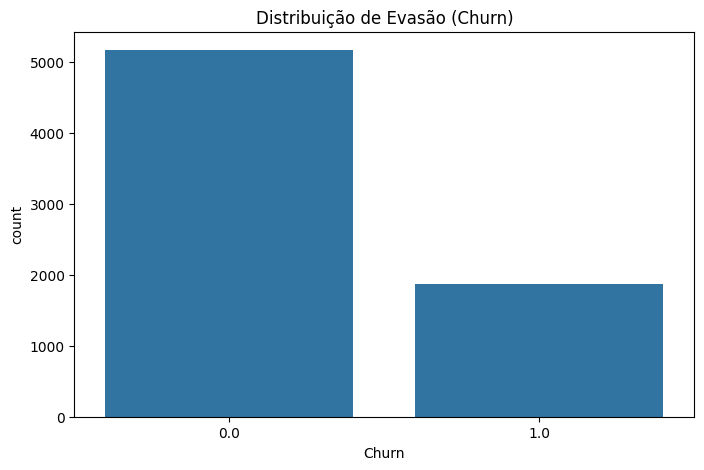

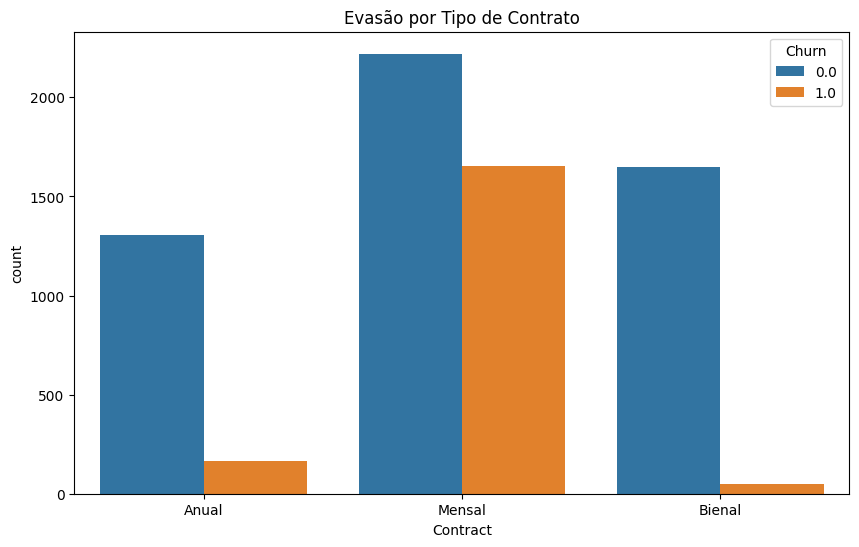

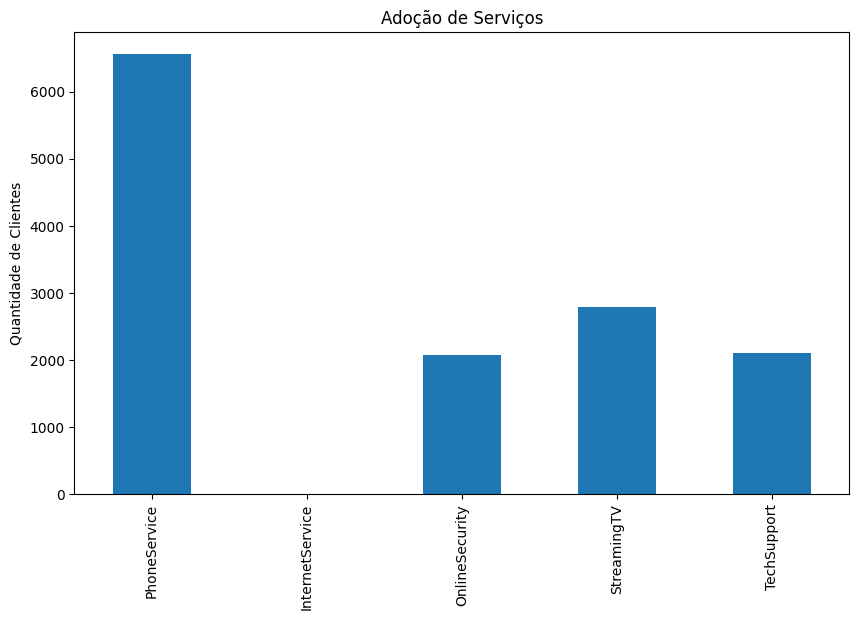

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribuição de Churn
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='Churn')
plt.title('Distribuição de Evasão (Churn)')
plt.show()

# 2. Churn por tipo de contrato
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='Contract', hue='Churn')
plt.title('Evasão por Tipo de Contrato')
plt.show()

# 3. Correlação entre variáveis numéricas
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']
if set(num_cols).issubset(df_clean.columns):
    plt.figure(figsize=(10,8))
    sns.heatmap(df_clean[num_cols + ['Churn']].corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de Correlação')
    plt.show()

# 4. Análise de serviços mais utilizados
services = ['PhoneService', 'InternetService', 'OnlineSecurity',
           'StreamingTV', 'TechSupport']
service_usage = df_clean[services].apply(pd.Series.value_counts).loc['Sim']
service_usage.plot(kind='bar', figsize=(10,6))
plt.title('Adoção de Serviços')
plt.ylabel('Quantidade de Clientes')
plt.show()

In [2]:
import pandas as pd
import json
from pandas import json_normalize
import requests
from io import StringIO
import numpy as np

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Baixar os dados
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

# Normaliza cada coluna de dicionário
customer_data = json_normalize(df['customer'])
phone_data = json_normalize(df['phone'])
internet_data = json_normalize(df['internet'])
account_data = json_normalize(df['account'])

df_final = pd.concat([
    df[['customerID', 'Churn']],  # Mantém as colunas principais
    customer_data,
    phone_data,
    internet_data,
    account_data
], axis=1)  # axis=1 para unir por colunas
df_final.columns = df_final.columns.str.replace('.', '_')

# Juntar tudo em um novo DataFrame
df_clean = df_final.copy()

# Converter Churn para binário
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

# Padronizar serviços
servicos_map = {
    'Yes': 'Sim',
    'No': 'Não',
    'No internet service': 'Sem internet'
}

cols_servicos = ['PhoneService', 'MultipleLines', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']

for col in cols_servicos:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace(servicos_map)

# Padronizar contratos
df_clean['Contract'] = df_clean['Contract'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal'
})

# Converter SeniorCitizen para categórico
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].map({1: 'Idoso', 0: 'Adulto'})

# Criar feature de tempo médio de gasto por mês
if 'Charges_Total' in df_clean.columns and 'tenure' in df_clean.columns:
    # Convert 'Charges_Total' to numeric, coercing errors
    df_clean['Charges_Total'] = pd.to_numeric(df_clean['Charges_Total'], errors='coerce')
    df_clean['AvgMonthlySpend'] = df_clean['Charges_Total'] / df_clean['tenure'].replace(0, 1)

# Criar flag para clientes com múltiplos serviços
services = ['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies']
df_clean['MultiServices'] = (df_clean[services] == 'Sim').sum(axis=1)

# Categorizar tempo como cliente
df_clean['TenureGroup'] = pd.cut(df_clean['tenure'],
                               bins=[0, 12, 24, 60, 100],
                               labels=['Novo', '1 ano', '2-5 anos', '5+ anos'])

In [3]:
# Verifica se temos a coluna de cobrança mensal (com nomes alternativos)
if 'MonthlyCharges' in df_clean.columns:
    coluna_mensal = 'MonthlyCharges'
elif 'CobrancaMensal' in df_clean.columns:
    coluna_mensal = 'CobrancaMensal'
elif 'ValorMensal' in df_clean.columns:
    coluna_mensal = 'ValorMensal'
elif 'Charges_Monthly' in df_clean.columns:
    coluna_mensal = 'Charges_Monthly'
else:
    print("Erro: Coluna de faturamento mensal não encontrada.")
    print("Colunas disponíveis:", df_clean.columns.tolist())
    exit()

# Cálculo do valor diário (considerando 30 dias/mês)
df_clean['Contas_Diarias'] = df_clean[coluna_mensal] / 30
df_clean['Contas_Diarias'] = df_clean['Contas_Diarias'].round(2)

# Criação de categorias de gasto diário
df_clean['Nivel_Gasto_Diario'] = pd.cut(
    df_clean['Contas_Diarias'],
    bins=[0, 1, 2, 5, 10, np.inf],
    labels=['<R$1', 'R$1-2', 'R$2-5', 'R$5-10', '>R$10'],
    right=False
)

# Mostra o resultado
print("\nDados com Contas Diárias calculadas:")
print(df_clean[['customerID', coluna_mensal, 'Contas_Diarias', 'Nivel_Gasto_Diario']].head())


Dados com Contas Diárias calculadas:
   customerID  Charges_Monthly  Contas_Diarias Nivel_Gasto_Diario
0  0002-ORFBO             65.6            2.19              R$2-5
1  0003-MKNFE             59.9            2.00              R$2-5
2  0004-TLHLJ             73.9            2.46              R$2-5
3  0011-IGKFF             98.0            3.27              R$2-5
4  0013-EXCHZ             83.9            2.80              R$2-5


In [4]:
import pandas as pd
import numpy as np


## 1. Análise das Variáveis Numéricas
numeric_cols = ['tenure', 'Charges_Monthly', 'Charges_Total', 'Contas_Diarias', 'AvgMonthlySpend']
desc_numericas = df_clean[numeric_cols].describe().transpose()
desc_numericas['CV'] = desc_numericas['std'] / desc_numericas['mean']  # Coeficiente de Variação

print("Estatísticas Descritivas - Variáveis Numéricas:")
print(desc_numericas[['count', 'mean', '50%', 'std', 'min', 'max', 'CV']].round(2))

Estatísticas Descritivas - Variáveis Numéricas:
                  count     mean      50%      std    min      max    CV
tenure           7267.0    32.35    29.00    24.57   0.00    72.00  0.76
Charges_Monthly  7267.0    64.72    70.30    30.13  18.25   118.75  0.47
Charges_Total    7256.0  2280.63  1391.00  2268.63  18.80  8684.80  0.99
Contas_Diarias   7267.0     2.16     2.34     1.00   0.61     3.96  0.47
AvgMonthlySpend  7256.0    64.76    70.25    30.22  13.78   121.40  0.47


In [5]:
# 2. Análise das Variáveis Categóricas

categorical_cols = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                   'Nivel_Gasto_Diario', 'TenureGroup']

print("\nDistribuição de Variáveis Categóricas:")
for col in categorical_cols:
    if col in df_clean.columns:
        print(f"\n{col}:")
        print(df_clean[col].value_counts(normalize=True).mul(100).round(2))


Distribuição de Variáveis Categóricas:

Churn:
Churn
0.0    73.46
1.0    26.54
Name: proportion, dtype: float64

gender:
gender
Male      50.57
Female    49.43
Name: proportion, dtype: float64

SeniorCitizen:
SeniorCitizen
Adulto    83.73
Idoso     16.27
Name: proportion, dtype: float64

Partner:
Partner
No     51.59
Yes    48.41
Name: proportion, dtype: float64

Dependents:
Dependents
No     69.99
Yes    30.01
Name: proportion, dtype: float64

PhoneService:
PhoneService
Sim    90.27
Não     9.73
Name: proportion, dtype: float64

Contract:
Contract
Mensal    55.11
Bienal    23.99
Anual     20.90
Name: proportion, dtype: float64

PaperlessBilling:
PaperlessBilling
Yes    59.32
No     40.68
Name: proportion, dtype: float64

PaymentMethod:
PaymentMethod
Electronic check             33.65
Mailed check                 22.91
Bank transfer (automatic)    21.87
Credit card (automatic)      21.58
Name: proportion, dtype: float64

Nivel_Gasto_Diario:
Nivel_Gasto_Diario
R$2-5     58.86
<R$1     

In [6]:
# 3. Análise Específica do Churn

print("\nAnálise de Churn por Categorias:")

# Churn por faixa de gasto diário
print("\nTaxa de Churn por Nível de Gasto Diário:")
print(df_clean.groupby('Nivel_Gasto_Diario')['Churn'].mean().mul(100).round(2))

# Churn por tempo como cliente
print("\nTaxa de Churn por Tempo como Cliente:")
print(df_clean.groupby('TenureGroup')['Churn'].mean().mul(100).round(2))

# Churn por tipo de contrato
print("\nTaxa de Churn por Tipo de Contrato:")
print(df_clean.groupby('Contract')['Churn'].mean().mul(100).round(2))


Análise de Churn por Categorias:

Taxa de Churn por Nível de Gasto Diário:
Nivel_Gasto_Diario
<R$1       9.67
R$1-2     26.32
R$2-5     33.29
R$5-10      NaN
>R$10       NaN
Name: Churn, dtype: float64

Taxa de Churn por Tempo como Cliente:
TenureGroup
Novo        47.68
1 ano       28.71
2-5 anos    18.34
5+ anos      6.61
Name: Churn, dtype: float64

Taxa de Churn por Tipo de Contrato:
Contract
Anual     11.27
Bienal     2.83
Mensal    42.71
Name: Churn, dtype: float64


/tmp/ipython-input-2562182231.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_clean.groupby('Nivel_Gasto_Diario')['Churn'].mean().mul(100).round(2))
/tmp/ipython-input-2562182231.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_clean.groupby('TenureGroup')['Churn'].mean().mul(100).round(2))


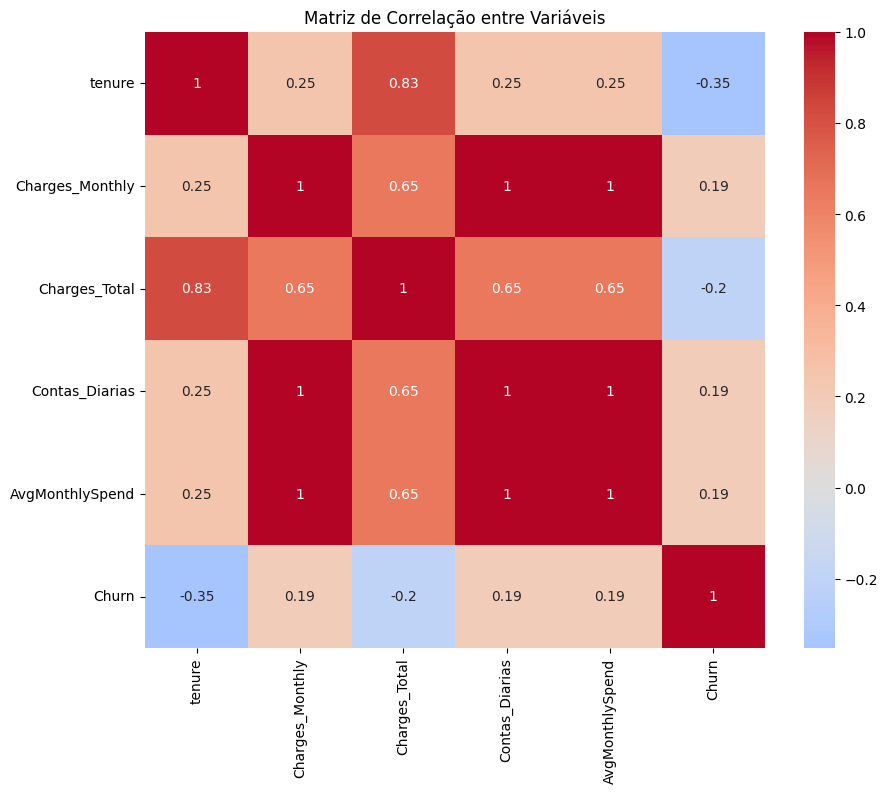

In [7]:
# 4. Correlações entre Variáveis

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
corr_matrix = df_clean[numeric_cols + ['Churn']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

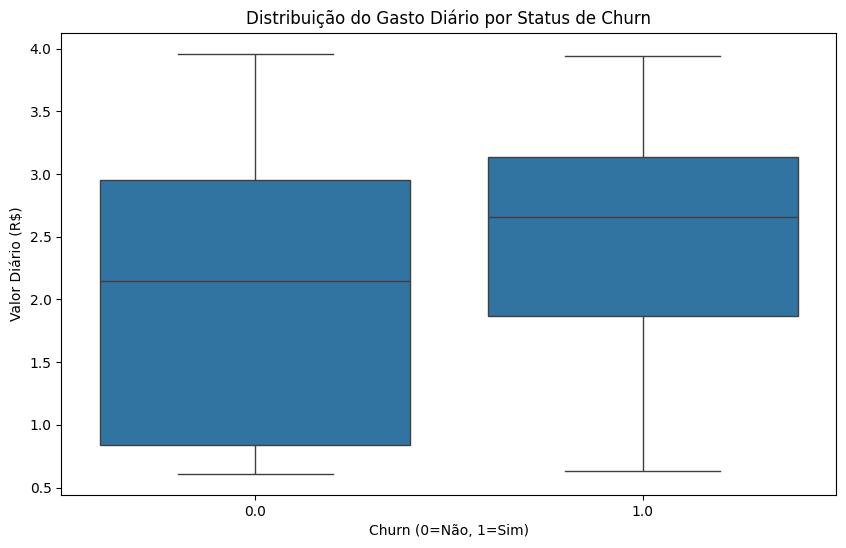

In [8]:
# 5. Análise de Distribuição

# Distribuição do gasto diário por status de Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Churn', y='Contas_Diarias')
plt.title('Distribuição do Gasto Diário por Status de Churn')
plt.ylabel('Valor Diário (R$)')
plt.xlabel('Churn (0=Não, 1=Sim)')
plt.show()

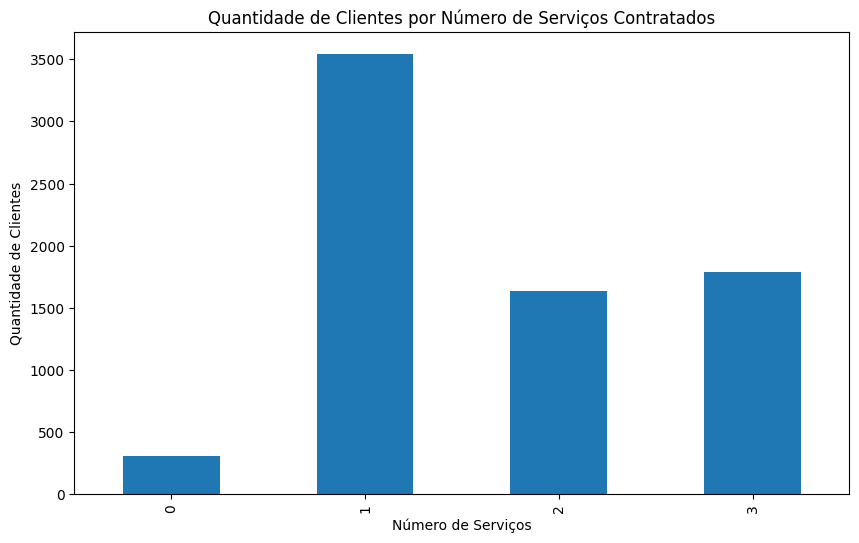

In [9]:
# 6. Análise de Composição

# Composição dos clientes por múltiplos serviços
plt.figure(figsize=(10, 6))
df_clean['MultiServices'].value_counts().sort_index().plot(kind='bar')
plt.title('Quantidade de Clientes por Número de Serviços Contratados')
plt.xlabel('Número de Serviços')
plt.ylabel('Quantidade de Clientes')
plt.show()

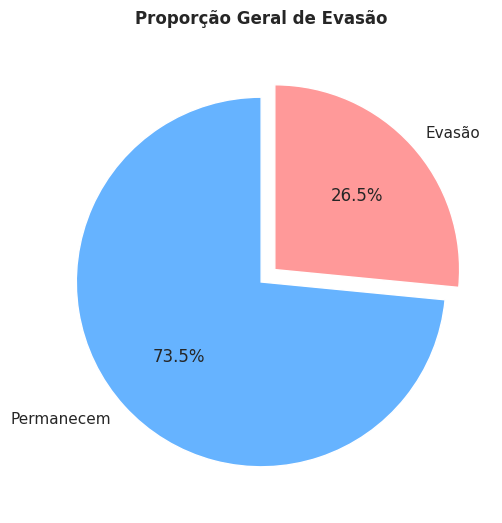

/tmp/ipython-input-2564300412.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_clean, x='Churn', palette=['#66b3ff','#ff9999'])


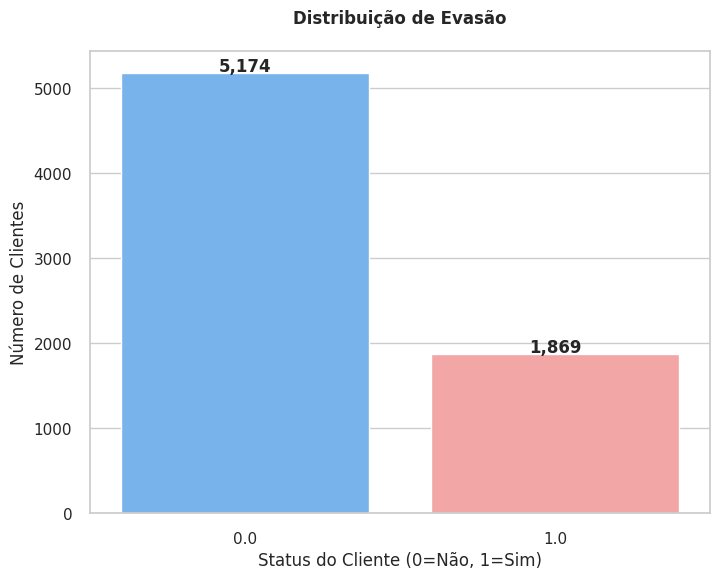

In [11]:
# Análise da Distribuição de Evasão (Churn)

# 1. Proporção Geral de Churn


import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo CORRIGIDA
plt.style.use('seaborn-v0_8')  # Usando a versão compatível
sns.set_theme(style="whitegrid", palette="pastel")  # Configuração moderna do seaborn

# 1. Proporção Geral de Churn (Gráfico de Pizza)
plt.figure(figsize=(8, 6))
df_clean['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Permanecem', 'Evasão'],
    startangle=90,
    explode=(0, 0.1),
    colors=['#66b3ff','#ff9999']
)
plt.title('Proporção Geral de Evasão', pad=20, fontweight='bold')
plt.ylabel('')
plt.show()

# 2. Gráfico de Barras com Contagem
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_clean, x='Churn', palette=['#66b3ff','#ff9999'])
plt.title('Distribuição de Evasão', pad=20, fontweight='bold')
plt.xlabel('Status do Cliente (0=Não, 1=Sim)')
plt.ylabel('Número de Clientes')

# Adicionando valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontweight='bold')

plt.show()

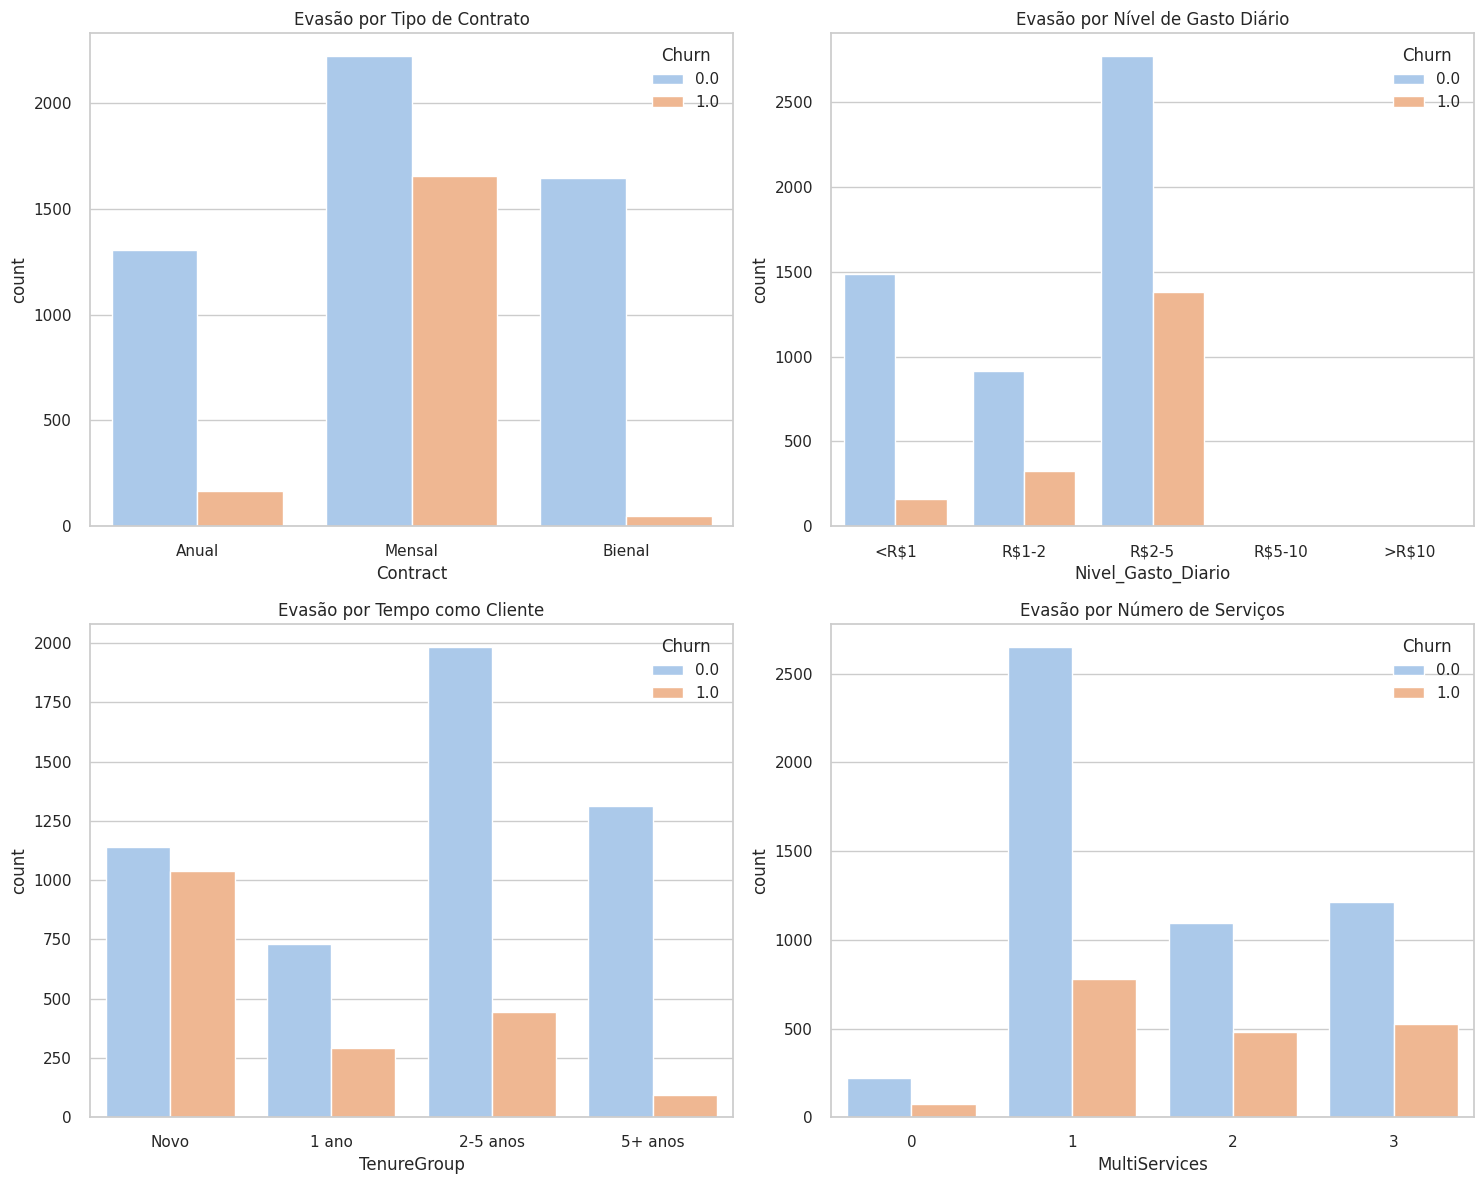

In [12]:
# 2. Distribuição por Grupos Estratégicos

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Churn por tipo de contrato
sns.countplot(data=df_clean, x='Contract', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Evasão por Tipo de Contrato')

# Churn por faixa de gasto
sns.countplot(data=df_clean, x='Nivel_Gasto_Diario', hue='Churn',
              order=['<R$1', 'R$1-2', 'R$2-5', 'R$5-10', '>R$10'],
              ax=axes[0,1])
axes[0,1].set_title('Evasão por Nível de Gasto Diário')

# Churn por tempo como cliente
sns.countplot(data=df_clean, x='TenureGroup', hue='Churn',
              order=['Novo', '1 ano', '2-5 anos', '5+ anos'],
              ax=axes[1,0])
axes[1,0].set_title('Evasão por Tempo como Cliente')

# Churn por número de serviços
sns.countplot(data=df_clean, x='MultiServices', hue='Churn', ax=axes[1,1])
axes[1,1].set_title('Evasão por Número de Serviços')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2872667974.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(col)['Churn'].mean().sort_values().plot(kind='bar')
/tmp/ipython-input-2872667974.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(col)['Churn'].mean().sort_values().plot(kind='bar')


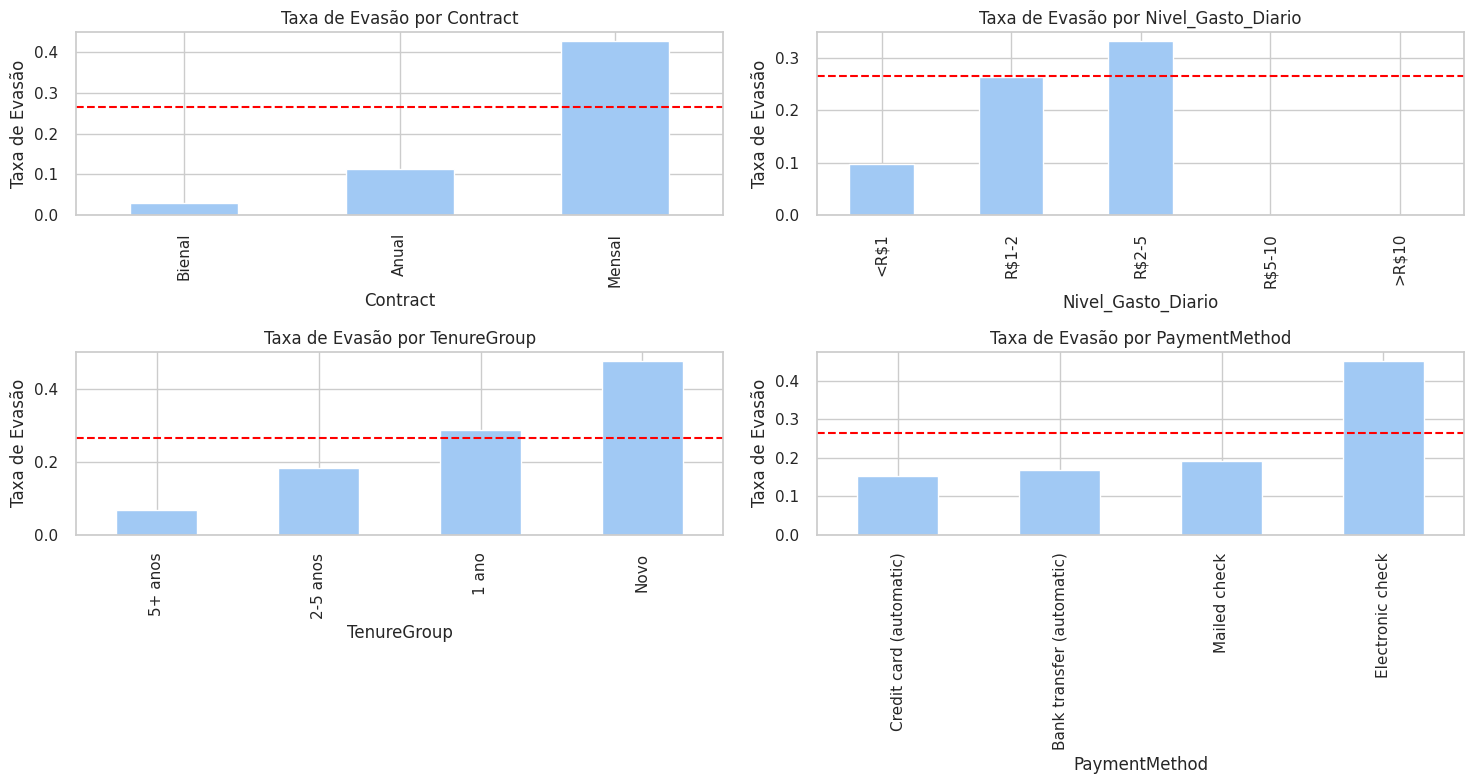

In [13]:
# 3. Taxa de Evasão por Categoria

# Selecionando categorias importantes
categorias = ['Contract', 'Nivel_Gasto_Diario', 'TenureGroup', 'PaymentMethod']

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorias, 1):
    plt.subplot(2, 2, i)
    df_clean.groupby(col)['Churn'].mean().sort_values().plot(kind='bar')
    plt.title(f'Taxa de Evasão por {col}')
    plt.axhline(y=df_clean['Churn'].mean(), color='red', linestyle='--')
    plt.ylabel('Taxa de Evasão')

plt.tight_layout()
plt.show()

In [14]:
# Análise de Correlação entre Variáveis no Dataset Telecom X

#1. Pré-processamento para Análise de Correlação

# Criar cópia do DataFrame para análise
df_corr = df_clean.copy()

# Converter variáveis categóricas relevantes para numéricas
df_corr['Contract'] = df_corr['Contract'].map({'Mensal': 0, 'Anual': 1, 'Bienal': 2})
df_corr['PaymentMethod'] = df_corr['PaymentMethod'].factorize()[0]
df_corr['InternetService'] = df_corr['InternetService'].factorize()[0]

# Selecionar colunas numéricas para correlação
numeric_cols = ['Churn', 'Contas_Diarias', 'MultiServices', 'tenure',
                'Contract', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod']

In [16]:
print("Colunas disponíveis no DataFrame:")
print(df_corr.columns.tolist())

Colunas disponíveis no DataFrame:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'AvgMonthlySpend', 'MultiServices', 'TenureGroup', 'Contas_Diarias', 'Nivel_Gasto_Diario']


In [17]:
from scipy.stats import pointbiserialr, chi2_contingency

# Criar cópia para análise
df_analysis = df_clean.copy()

# Converter variáveis categóricas relevantes para análise
df_analysis['Contract'] = df_analysis['Contract'].map({'Mensal': 0, 'Anual': 1, 'Bienal': 2})
df_analysis['InternetService'] = df_analysis['InternetService'].factorize()[0]
df_analysis['PaperlessBilling'] = df_analysis['PaperlessBilling'].map({'Sim': 1, 'Não': 0})

/tmp/ipython-input-2208169684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analysis, x='Churn', y='Contas_Diarias', palette=['#66b3ff','#ff9999'])


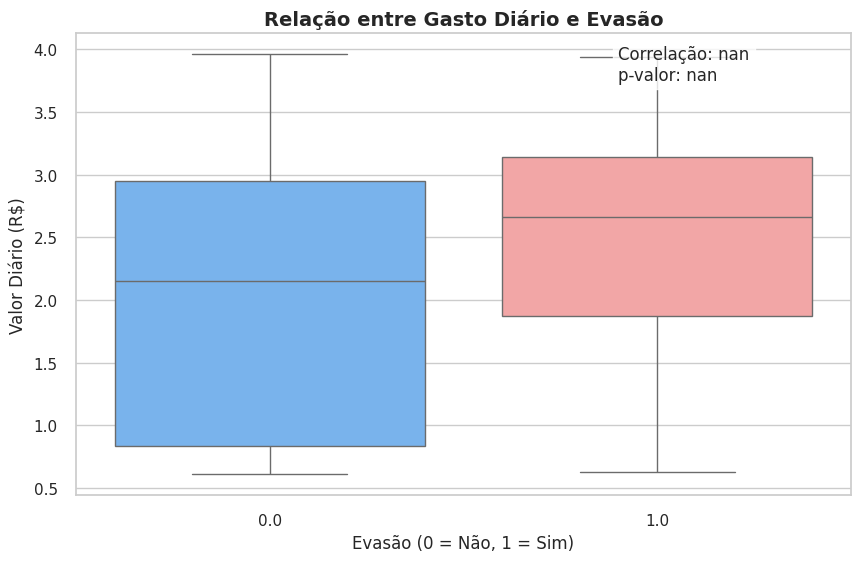

In [18]:
# 2. Análise da Relação entre Contas Diárias e Evasão

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_analysis, x='Churn', y='Contas_Diarias', palette=['#66b3ff','#ff9999'])
plt.title('Relação entre Gasto Diário e Evasão', fontsize=14, fontweight='bold')
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Valor Diário (R$)', fontsize=12)

# Cálculo da correlação ponto-bisserial
corr, p_value = pointbiserialr(df_analysis['Contas_Diarias'], df_analysis['Churn'])
plt.text(0.7, 0.9, f'Correlação: {corr:.2f}\np-valor: {p_value:.4f}',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

/tmp/ipython-input-2295989453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_analysis, x='MultiServices', y='Churn', estimator=np.mean,


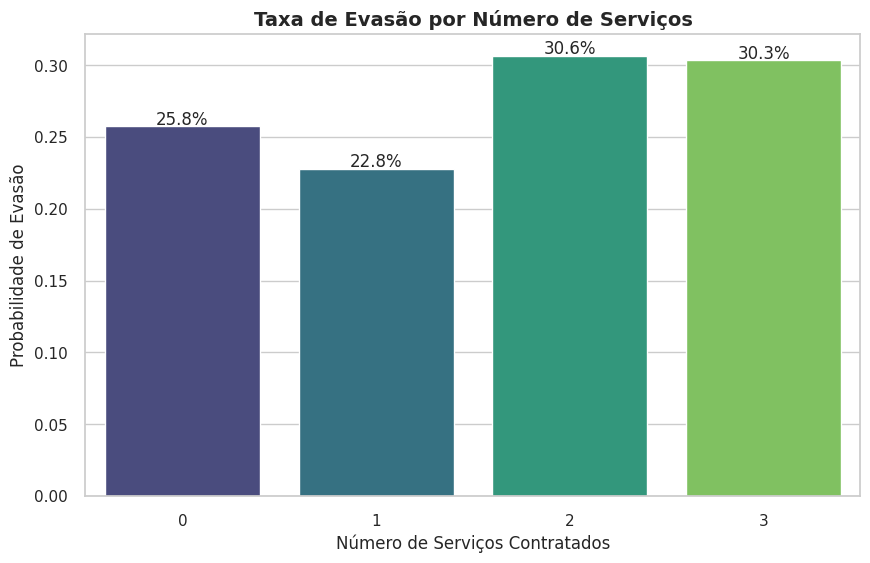


Teste Qui-Quadrado:
Estatística: 51.47, p-valor: 0.0000


In [19]:
# 3. Impacto dos Serviços Contratados no Churn

# Análise por número de serviços
plt.figure(figsize=(10, 6))
sns.barplot(data=df_analysis, x='MultiServices', y='Churn', estimator=np.mean,
            palette='viridis', errorbar=None)
plt.title('Taxa de Evasão por Número de Serviços', fontsize=14, fontweight='bold')
plt.xlabel('Número de Serviços Contratados', fontsize=12)
plt.ylabel('Probabilidade de Evasão', fontsize=12)

# Adicionar valores nas barras
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Teste de qui-quadrado
contingency_table = pd.crosstab(df_analysis['MultiServices'], df_analysis['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nTeste Qui-Quadrado:\nEstatística: {chi2:.2f}, p-valor: {p:.4f}")

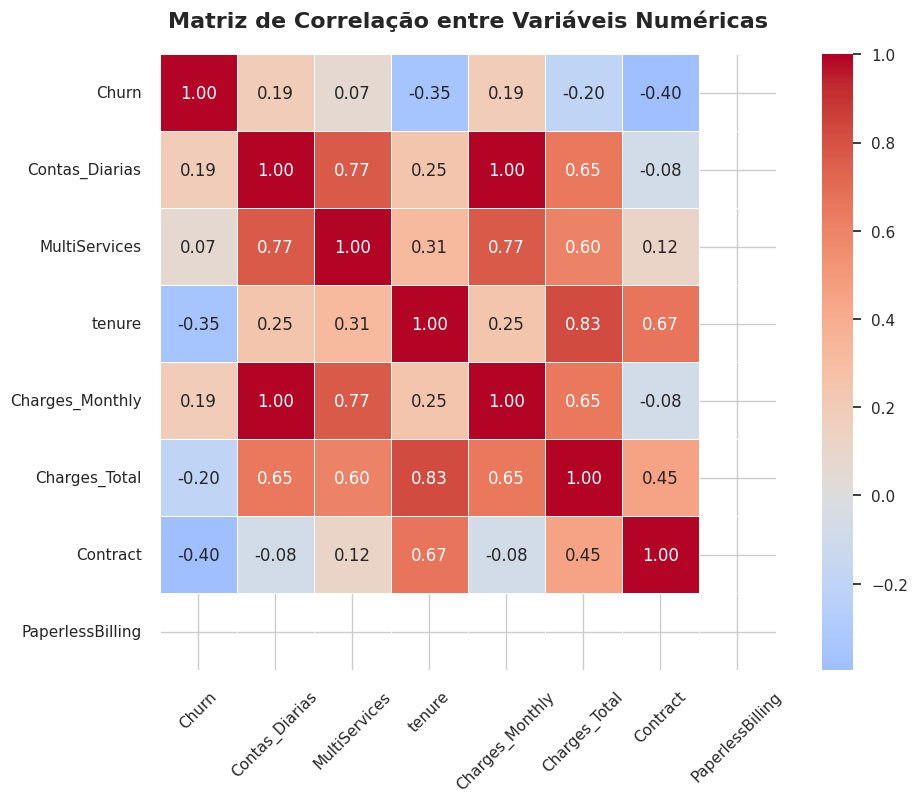

In [20]:
# 4. Matriz de Correlação das Principais Variáveis

# Selecionar colunas numéricas relevantes
numeric_cols = ['Churn', 'Contas_Diarias', 'MultiServices', 'tenure',
               'Charges_Monthly', 'Charges_Total', 'Contract', 'PaperlessBilling']

plt.figure(figsize=(12, 8))
corr_matrix = df_analysis[numeric_cols].corr()

# Mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt=".2f", linewidths=.5, square=True)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16, pad=20, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

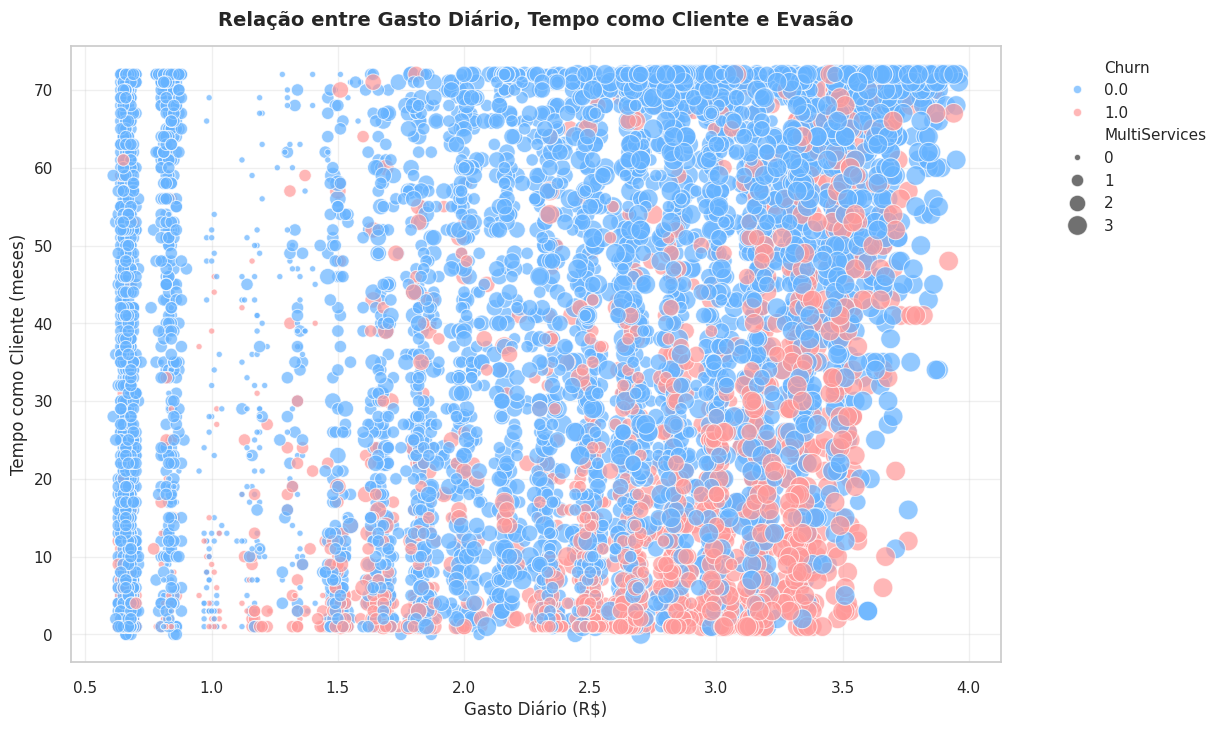

In [21]:
# 5. Análise Multivariada Avançada

# Relação entre múltiplas variáveis
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_analysis, x='Contas_Diarias', y='tenure',
                hue='Churn', size='MultiServices',
                sizes=(20, 200), alpha=0.7,
                palette=['#66b3ff','#ff9999'])
plt.title('Relação entre Gasto Diário, Tempo como Cliente e Evasão',
          fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Gasto Diário (R$)', fontsize=12)
plt.ylabel('Tempo como Cliente (meses)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# Análise adicional
high_value_churn = df_analysis[(df_analysis['Contas_Diarias'] > 3) & (df_analysis['Churn'] == 1)]
print(f"Clientes de alto valor que deram churn: {len(high_value_churn)}")
print(high_value_churn['Contract'].value_counts(normalize=True))

Clientes de alto valor que deram churn: 564
Contract
0    0.781915
1    0.163121
2    0.054965
Name: proportion, dtype: float64
